# TP 2 - IA - Grupo 10
# Evaluación de Riesgos Crediticios usando Algoritmos Genéticos

## Descripción del problema

El problema que se quiere resolver es identificar qué grupo de personas representa el menor riesgo al momento de otorgar créditos. Para esto, se analizarán varios grupos con características diferentes, como ingresos, historial crediticio, y si reciben algún tipo de ayuda social, entre otros. El objetivo es encontrar patrones que permitan dar créditos de manera más segura, evitando que se le otorguen a personas con alto riesgo de no pagar y asegurando que se le concedan a quienes tengan mayor capacidad de pago.

Los métodos actuales para evaluar el riesgo crediticio a veces no son lo suficientemente precisos, ya que no toman en cuenta bien la interacción entre las distintas características de las personas. Esto puede hacer que se den créditos a personas con un riesgo alto o que se rechacen a buenos candidatos. Por eso, es necesario un sistema inteligente que analice mejor los datos y haga predicciones más exactas.

## Justificación del Uso de Algoritmos Genéticos

Para resolver este problema, se va a utilizar un **Algoritmo Genético (AG)**. Este tipo de algoritmo es útil para buscar soluciones óptimas en problemas con muchas variables y de alta complejidad. Los AG son adecuados para explorar combinaciones de factores, como ingresos o historial crediticio, y encontrar soluciones que minimicen el riesgo crediticio, maximizando al mismo tiempo la eficiencia en la búsqueda de respuestas óptimas.

## Características que serán evaluadas para encontrar la solución

Las características seleccionadas reflejan el perfil financiero de las personas, lo que ayudará a la empresa a evaluar el riesgo de otorgar un crédito. Cada característica tiene una justificación clara:

- Edad: Influye en la estabilidad financiera y la capacidad de cumplir con el pago. Por ejemplo, personas en edad laboral pueden tener menos riesgo que personas muy jóvenes o mayores sin ingresos fijos.
- Historial crediticio: Es clave para conocer el comportamiento de una persona respecto a pagos previos, un buen historial reduce el riesgo.
- Tipo de empleo (blanco o negro): Las personas que trabajan en blanco suelen tener más estabilidad económica, lo que reduce el riesgo de impago.
- Estado civil (soltero/casado/divorciado): A veces, personas casadas o con responsabilidades familiares pueden tener más estabilidad económica.
- Plan social: Indica que la persona recibe ayuda del estado, lo que puede significar un menor ingreso disponible y mayor riesgo.
- Cantidad de ingresos: Un ingreso alto reduce el riesgo de impago, mientras que ingresos bajos lo incrementan.

La combinación de estas características permite construir un perfil de riesgo más completo para cada persona y facilita el armado de una selección de personas con el menor riesgo posible.

## Tecnologías Utilizadas

- **Python**: Lenguaje de programación principal.
- **DEAP**: Librería especializada en algoritmos evolutivos y genéticos.
- **Numpy**: Para operaciones numéricas y manejo de matrices.
- **Matplotlib**: Para la visualización de resultados y gráficos.

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import time

In [4]:
def evaluar_edad(edad):
    if edad == [0, 0]:
        return 3  # Alto riesgo
    elif edad == [0, 1]:
        return 1  # Bajo riesgo
    elif edad == [1, 0]:
        return 2  # Riesgo moderado
    else:
        return 4  # Valor por defecto, Más alto riesgo

def evaluar_historial_crediticio(historial):
    if historial == [0, 0]:
        return 4  # Muy alto riesgo
    elif historial == [0, 1]:
        return 3  # Alto riesgo
    elif historial == [1, 0]:
        return 2  # Riesgo moderado
    elif historial == [1, 1]:
        return 1  # Bajo riesgo
    else:
        return 5 # Valor por defecto, Más alto riesgo

def evaluar_tipo_empleo(tipo_empleo):
    return 2 if tipo_empleo == 1 else 1  # 2 = Alto riesgo, 1 = Bajo riesgo

def evaluar_estado_civil(estado_civil):
    if estado_civil == [0, 0]:
        return 2  # Riesgo moderado
    elif estado_civil == [0, 1]:
        return 1  # Bajo riesgo
    elif estado_civil == [1, 0]:
        return 3  # Alto riesgo
    else:
        return 4 # Valor por defecto, Más alto riesgo

def evaluar_plan_social(plan_social):
    return 2 if plan_social == 0 else 1  # 2 = Alto riesgo, 1 = Bajo riesgo

def evaluar_ingresos(ingresos):
    if ingresos == [0, 0]:
        return 3  # Alto riesgo
    elif ingresos == [0, 1]:
        return 2  # Riesgo moderado
    elif ingresos == [1, 0]:
        return 1  # Bajo riesgo
    elif ingresos == [1, 1]:
        return 1  # Bajo riesgo
    else:
        return 4 # Valor por defecto, Más alto riesgo

In [5]:
def funcion_de_aptitud(individual):
    riesgo = 0
    riesgo += evaluar_edad(individual[0:2])
    riesgo += evaluar_historial_crediticio(individual[2:4])
    riesgo += evaluar_tipo_empleo(individual[4])
    riesgo += evaluar_estado_civil(individual[5:7])
    riesgo += evaluar_plan_social(individual[7])
    riesgo += evaluar_ingresos(individual[8:10])
    return riesgo,

In [6]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", funcion_de_aptitud)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [7]:
def graficar_resultados(logbook):
    gen = logbook.select("gen")  # Número de generaciones
    min_fits = logbook.select("min")  # Mínimo de riesgo en cada generación
    avg_fits = logbook.select("avg")  # Promedio de riesgo en cada generación

    plt.figure(figsize=(10, 6))
    plt.plot(gen, min_fits, label="Mínimo riesgo")
    plt.plot(gen, avg_fits, label="Riesgo promedio")
    plt.xlabel("Generación")
    plt.ylabel("Riesgo")
    plt.title("Evolución del Riesgo Crediticio a lo Largo de las Generaciones")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

In [8]:
def mostrar_mejor_individuo(best_individual):
    print(f"Mejor individuo (cromosoma): {best_individual}")
    print(f"Riesgo asociado: {funcion_de_aptitud(best_individual)[0]}")
    print(f"Edad: {best_individual[0:2]}")
    print(f"Historial crediticio: {best_individual[2:4]}")
    print(f"Tipo de empleo: {best_individual[4]}")
    print(f"Estado civil: {best_individual[5:7]}")
    print(f"Plan social: {best_individual[7]}")
    print(f"Ingresos: {best_individual[8:10]}")

In [9]:
def interpretar_cromosoma(cromosoma):
    # Cada característica se evalúa directamente con los valores binarios individuales
    edad_bits = cromosoma[0:2]  # Los primeros 2 bits
    historial_bits = cromosoma[2:4]  # Los siguientes 2 bits
    empleo_bit = cromosoma[4]  # 1 bit
    estado_civil_bits = cromosoma[5:7]  # 2 bits
    plan_social_bit = cromosoma[7]  # 1 bit
    ingresos_bits = cromosoma[8:10]  # Últimos 2 bits

    # Interpretar los bits de edad
    if edad_bits == [0, 0]:
        edad = "18-25 años"
    elif edad_bits == [0, 1]:
        edad = "26-50 años"
    elif edad_bits == [1, 0]:
        edad = "51-80 años"
    else:
        edad = "Edad desconocida"
    
    # Interpretar los bits del historial crediticio
    if historial_bits == [0, 0]:
        historial = "Menor a 400"
    elif historial_bits == [0, 1]:
        historial = "400-600"
    elif historial_bits == [1, 0]:
        historial = "600-800"
    elif historial_bits == [1, 1]:
        historial = "Mayor a 800"
    
    # Interpretar el bit de empleo
    empleo = "Empleo en negro" if empleo_bit == 1 else "Empleo en blanco"
    
    # Interpretar los bits del estado civil
    if estado_civil_bits == [0, 0]:
        estado_civil = "Soltero"
    elif estado_civil_bits == [0, 1]:
        estado_civil = "Casado"
    elif estado_civil_bits == [1, 0]:
        estado_civil = "Divorciado"
    else:
        estado_civil = "Estado civil desconocido"
    
    # Interpretar el bit de plan social
    plan_social = "No recibe plan social" if plan_social_bit == 1 else "Recibe plan social"
    
    # Interpretar los bits de ingresos
    if ingresos_bits == [0, 0]:
        ingresos = "Menor a 600,000"
    elif ingresos_bits == [0, 1]:
        ingresos = "600,000-1,200,000"
    elif ingresos_bits == [1, 0]:
        ingresos = "Mayor a 1,200,000"
    else:
        ingresos = "Ingresos desconocidos"
    
    # Mostrar las características interpretadas
    print(f"Edad: {edad} - {edad_bits}")
    print(f"Historial crediticio: {historial} - {historial_bits}")
    print(f"Empleo: {empleo} - {empleo_bit}")
    print(f"Estado civil: {estado_civil} - {estado_civil_bits}")
    print(f"Plan social: {plan_social} - {plan_social_bit}")
    print(f"Ingresos: {ingresos} - {ingresos_bits}")


In [10]:
# Configuración de los métodos genéticos (Selección, Cruzamiento, Mutación)

# Método de selección
# Puedes cambiar a otros métodos como tools.selTournament, tools.selBest, etc.
# toolbox.register("select", tools.selRoulette)

# Método de cruzamiento
# Puedes cambiar a otros métodos como tools.cxTwoPoint, tools.cxUniform, etc.
# toolbox.register("mate", tools.cxOnePoint)

# Método de mutación
# Puedes cambiar a otros métodos como tools.mutShuffleIndexes, tools.mutGaussian, etc.
# toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)

gen	nevals	min	avg  
0  	50    	8  	12.24
1  	35    	7  	10.6 
2  	35    	7  	9.36 
3  	35    	6  	8.38 
4  	36    	6  	7.84 
5  	37    	6  	7.04 
6  	28    	6  	6.38 
7  	40    	6  	6.38 
8  	38    	6  	6.22 
9  	29    	6  	6.3  
10 	37    	6  	6.26 
11 	28    	6  	6.22 
12 	35    	6  	6.26 
13 	33    	6  	6.14 
14 	33    	6  	6.6  
15 	31    	6  	6.56 
16 	40    	6  	6.38 
17 	30    	6  	6.1  
18 	41    	6  	6.24 
19 	31    	6  	6.26 
20 	37    	6  	6.28 
21 	37    	6  	6.3  
22 	35    	6  	6.28 
23 	37    	6  	6.3  
24 	28    	6  	6.18 
25 	37    	6  	6.38 
26 	34    	6  	6.28 
27 	36    	6  	6.44 
28 	38    	6  	6.76 
29 	33    	6  	6.42 
30 	37    	6  	6.38 
31 	35    	6  	6.26 
32 	37    	6  	6.24 
33 	41    	6  	6.22 
34 	28    	6  	6.22 
35 	34    	6  	6.18 
36 	33    	6  	6.28 
37 	39    	6  	6.28 
38 	36    	6  	6.3  
39 	34    	6  	6.2  
40 	32    	6  	6.32 
41 	36    	6  	6.34 
42 	36    	6  	6.44 
43 	40    	6  	6.3  
44 	37    	6  	6.46 
45 	36    	6  	6.32 
46 	34    	6 

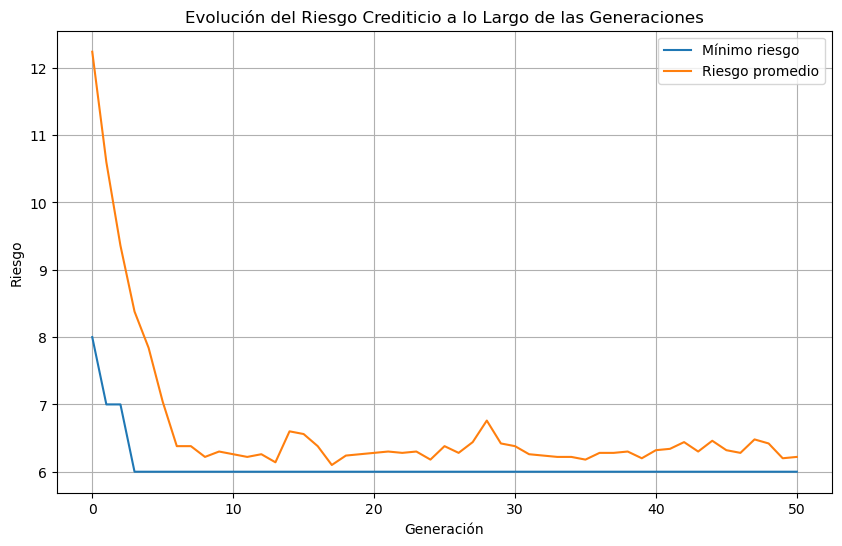

Mejor individuo (cromosoma): [0, 1, 1, 1, 0, 0, 1, 1, 1, 1]
Riesgo asociado: 6
Edad: 26-50 años - [0, 1]
Historial crediticio: Mayor a 800 - [1, 1]
Empleo: Empleo en blanco - 0
Estado civil: Casado - [0, 1]
Plan social: No recibe plan social - 1
Ingresos: Ingresos desconocidos - [1, 1]


In [11]:
def main():
    # Semilla aleatoria basada en el tiempo para variar los resultados en cada corrida
    random.seed(time.time())
    
    # Inicialización de la población y parámetros del algoritmo genético
    population = toolbox.population(n=50)  # Población inicial
    ngen = 50  # Número de generaciones
    cxpb = 0.5  # Probabilidad de cruce
    mutpb = 0.4  # Probabilidad de mutación

    # Definir estadísticas para registrar la aptitud (riesgo) en cada generación
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)  # Mínimo riesgo
    stats.register("avg", np.mean)  # Promedio de riesgo

    logbook = tools.Logbook()  # Para guardar las estadísticas

    # Ejecutar el algoritmo genético
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, 
                                              stats=stats, halloffame=None, verbose=True)

    # Graficar los resultados
    graficar_resultados(logbook)
    
    # Seleccionar el mejor individuo
    best_individual = tools.selBest(population, 1)[0]

    # Mostrar el mejor individuo interpretado
    print(f"Mejor individuo (cromosoma): {best_individual}")
    print(f"Riesgo asociado: {funcion_de_aptitud(best_individual)[0]}")
    interpretar_cromosoma(best_individual)

# Ejecutar la función principal
main()